<a href="https://colab.research.google.com/github/ridlofebrio/PCVK_GANJIL_2024/blob/main/PCVK_modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 2


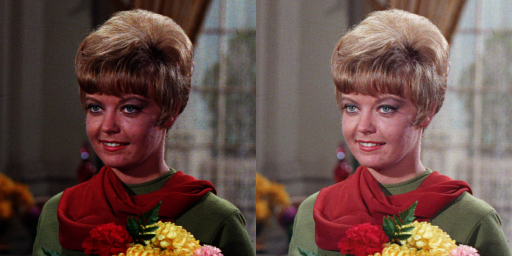

In [ ]:
print('Gamma Correction pada citra')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0

image = cv.imread('/content/drive/MyDrive/image/female2.tiff')

# Apply gamma correction
gamma_image = np.array(255 * (image / 255) ** (1.0 / gamma), dtype='uint8')

# Concatenate the original and corrected images
final_frame = cv.hconcat([image, gamma_image])

cv2_imshow(final_frame)


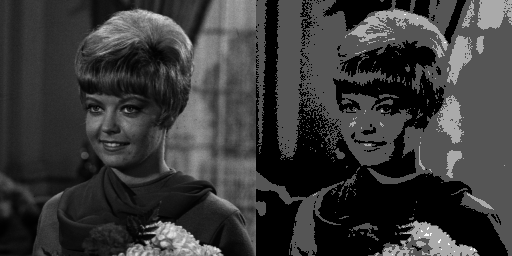

In [ ]:
bit_depth = 2

levels = pow(2, bit_depth)  # Number of gray levels for the given bit depth
scale_factor = 255 / (levels - 1)

original = cv.imread('/content/drive/MyDrive/image/female2.tiff', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(round(original[y, x] / scale_factor) * scale_factor, 0, 255);


final_frame = cv.hconcat([original, depth_image])

# Display the images side by side
cv2_imshow(final_frame)

Average Denoising for Noise Number: 5
--------------------------------
PSNR value for noise number 5: 27.5275287051894 dB


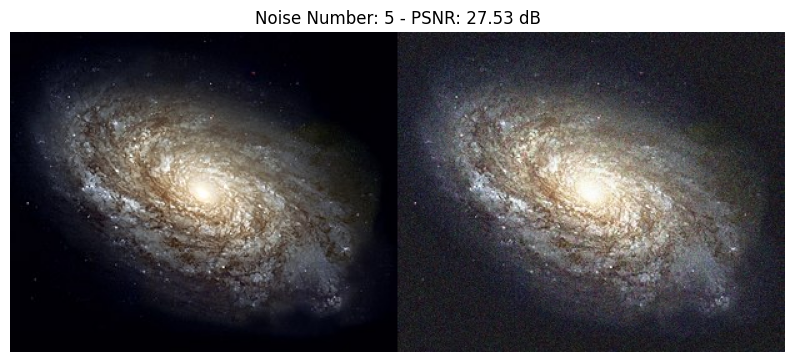

Average Denoising for Noise Number: 10
--------------------------------
PSNR value for noise number 10: 27.54156232793686 dB


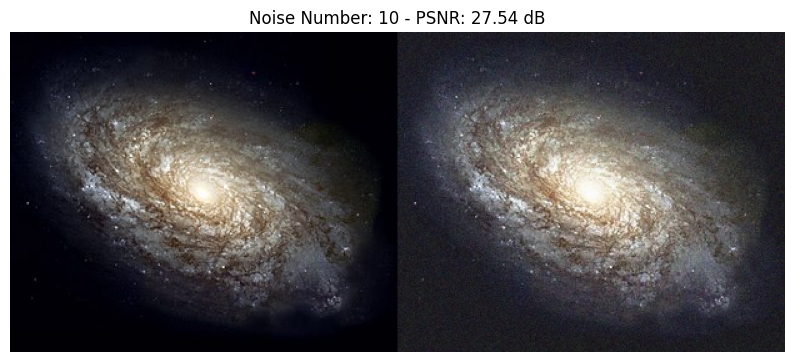

Average Denoising for Noise Number: 20
--------------------------------
PSNR value for noise number 20: 27.54834508944179 dB


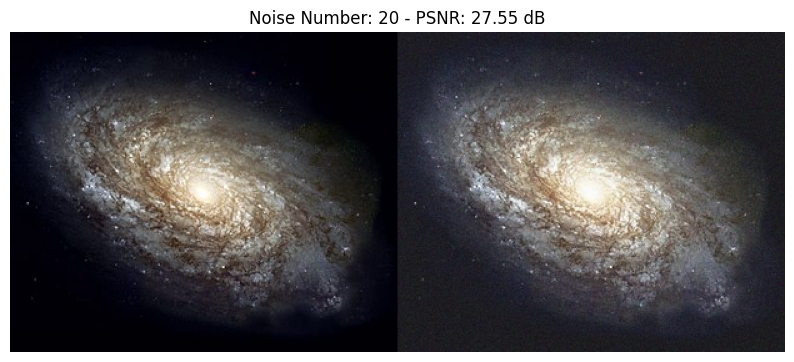

Average Denoising for Noise Number: 40
--------------------------------
PSNR value for noise number 40: 27.50610635817537 dB


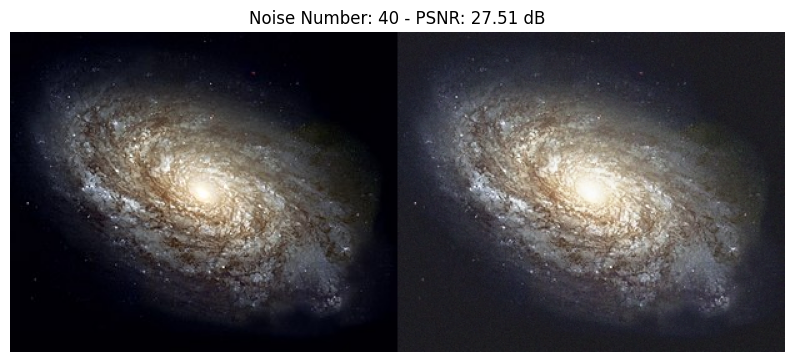

Average Denoising for Noise Number: 80
--------------------------------
PSNR value for noise number 80: 27.50429174872556 dB


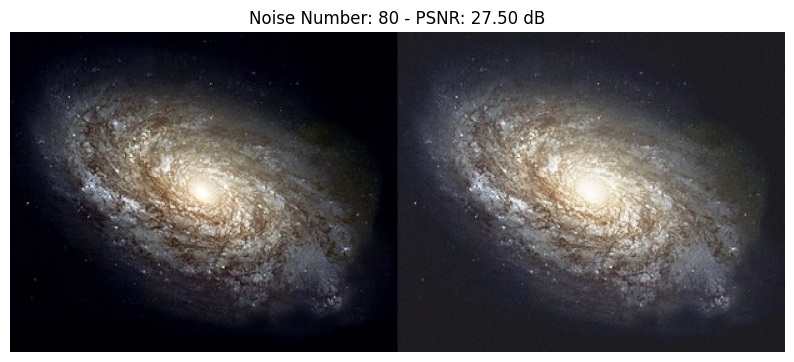

Average Denoising for Noise Number: 100
--------------------------------
PSNR value for noise number 100: 27.505773515069627 dB


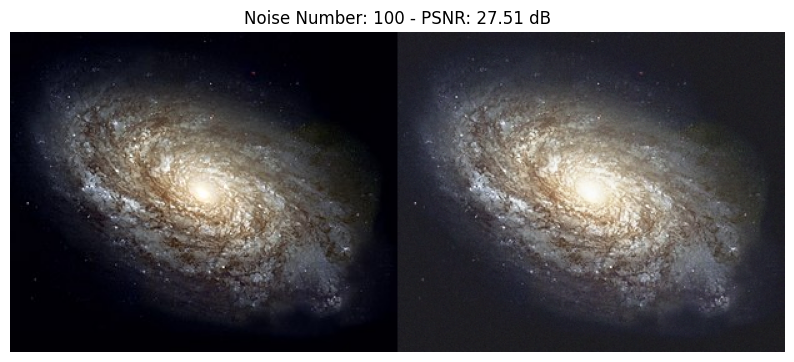

In [ ]:
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Load the original image
original = cv.imread('/content/drive/MyDrive/image/galaxy.jpg')

# Load noisy images into a list
cv_img = []
for img in glob.glob('/content/drive/MyDrive/image/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Define the array of noise numbers to loop over
noise_numbers = [5, 10, 20, 40, 80, 100]

# Loop through each noise number
for noise_number in noise_numbers:
    print(f'Average Denoising for Noise Number: {noise_number}')
    print('--------------------------------')

    # Check if we have enough noisy images
    if noise_number > len(cv_img):
        print(f"Only {len(cv_img)} noisy images available, using {len(cv_img)} instead.")
        noise_number = len(cv_img)

    # Initialize the denoised image with the first noisy image
    dst = cv_img[0]

    # Loop over the noisy images and apply weighted averaging
    for i in range(noise_number):
        if i == 0:
            continue
        else:
            alpha = 1.0 / (i + 1)
            beta = 1.0 - alpha
            dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    # Calculate PSNR for the denoised image
    compressed = dst
    psnr = PSNR(original, compressed)
    print(f'PSNR value for noise number {noise_number}: {psnr} dB')

    # Concatenate the original and the denoised image
    galaxy_frame = cv.hconcat([original, dst])

    # Display the result using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(galaxy_frame, cv.COLOR_BGR2RGB))
    plt.title(f'Noise Number: {noise_number} - PSNR: {psnr:.2f} dB')
    plt.axis('off')
    plt.show()

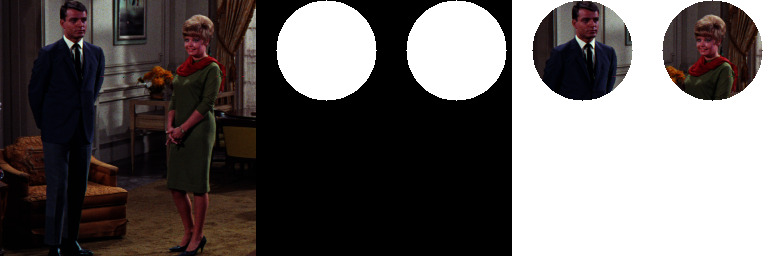

In [13]:
original_image = cv.imread('/content/drive/MyDrive/image/couple.tiff')

#  Menentukan pusat dan jari-jari lingkaran pertama
center1 = (70, 50)
radius1 = 50

#  Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 50)
radius2 = 50

# hitam
mask = np.zeros(original_image.shape, dtype=np.uint8)
# putih
unmask = np.ones(original_image.shape, dtype=np.uint8) * 255

# Gambarlah lingkaran pertama pada mask
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)
cv.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)

# gabung gambar hasil dengan mask yang telah di tentukan circle
masked = original_image & mask

# Buat mask negatif (putih di atas hitam)
mask_negatif = unmask - mask

# Gabungkan mask negatif dengan citra hasilnya
masked_putih = masked + mask_negatif


result = cv.hconcat((original_image, mask, masked_putih))
cv2_imshow(result)

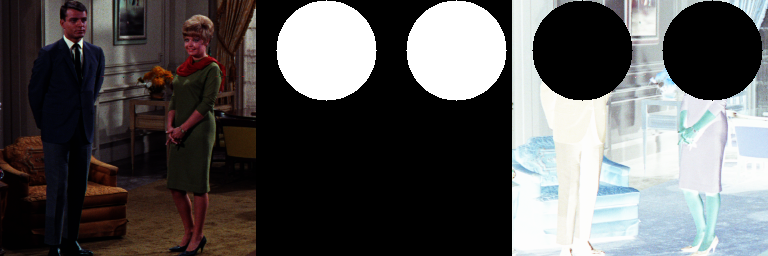

In [17]:
masked = ~original_image & ~mask
mask_negatif = unmask - mask
masked_putih = masked + mask_negatif

result = cv.hconcat((original_image, mask, masked_putih))
cv2_imshow(result)


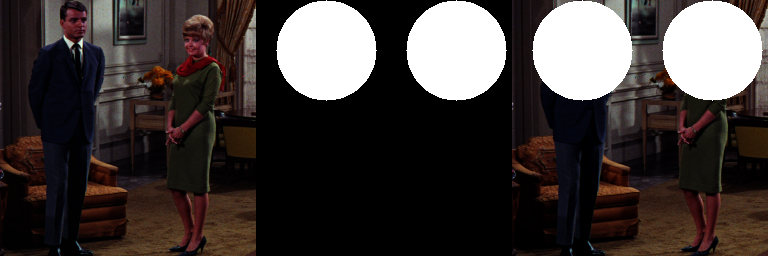

In [18]:
masked = original_image | mask
mask_negatif = unmask - mask
masked_putih = masked + mask_negatif

result = cv.hconcat((original_image, mask, masked_putih))
cv2_imshow(result)

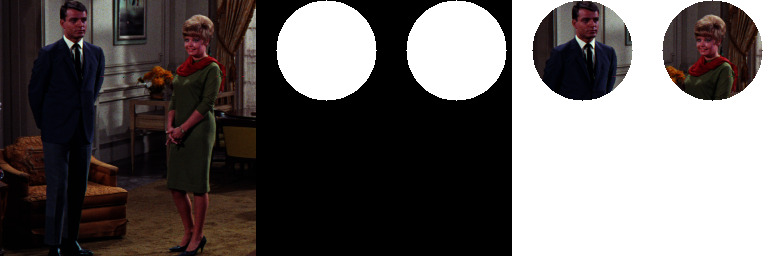

In [19]:
masked = original_image & mask
mask_negatif = unmask - mask
masked_putih = masked + mask_negatif

result = cv.hconcat((original_image, mask, masked_putih))
cv2_imshow(result)

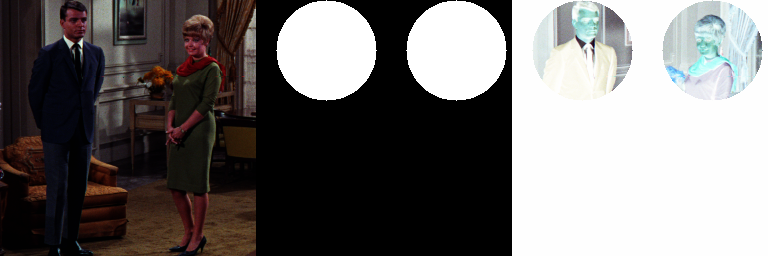

In [20]:
masked = cv.bitwise_not(cv.bitwise_and(original_image, mask))
mask_negatif = unmask - mask
masked_putih = masked + mask_negatif

result = cv.hconcat((original_image, mask, masked_putih))
cv2_imshow(result)

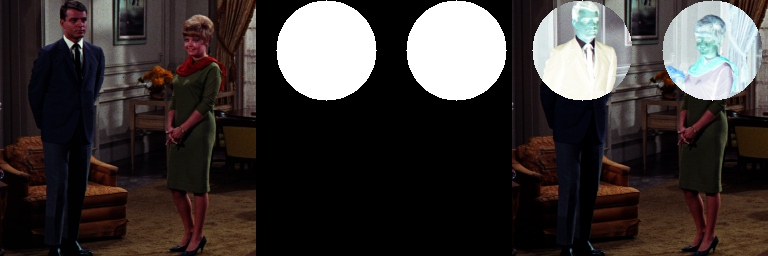

In [21]:
masked = result = cv.bitwise_xor(original_image, mask)
mask_negatif = unmask - mask
masked_putih = masked + mask_negatif

result = cv.hconcat((original_image, mask, masked_putih))
cv2_imshow(result)